In [1]:
import tensorflow as tf
from tensorflow.keras import layers
import os
import numpy as np
import time
import matplotlib.pyplot as plt
import cv2

# Dataset
### 15747 images (64,64,3)



In [2]:
dataset_dir = "./cats"

dataset = []
for each in os.listdir(dataset_dir):
    image = cv2.imread(os.path.join(dataset_dir, each))
    if type(image) != type(None):
        dataset.append(image)

dataset = np.array(dataset)
print(dataset.shape)

(15747, 64, 64, 3)


# Generator 


In [3]:
def generator_model():
    model = tf.keras.Sequential()
    
    model.add(layers.Dense(4*4*1024, input_shape=(100,)))
    model.add(layers.Reshape((4, 4, 1024)))
    model.add(layers.LeakyReLU())
    
    model.add(layers.Conv2DTranspose(filters=512, kernel_size=(5,5), strides=(2,2), padding='same',
            kernel_initializer=tf.initializers.truncated_normal(stddev=0.02)))
    model.add(layers.BatchNormalization())
    model.add(layers.LeakyReLU())
    
    model.add(layers.Conv2DTranspose(filters=256, kernel_size=(5,5), strides=(2,2), padding='same',
             kernel_initializer=tf.initializers.truncated_normal(stddev=0.02)))
    model.add(layers.BatchNormalization())
    model.add(layers.LeakyReLU())
    
    model.add(layers.Conv2DTranspose(filters=128, kernel_size=(5,5), strides=(2,2), padding='same',
             kernel_initializer=tf.initializers.truncated_normal(stddev=0.02)))
    model.add(layers.BatchNormalization())
    model.add(layers.LeakyReLU())
    

    model.add(layers.Conv2DTranspose(filters=64, kernel_size=(5,5), strides=(2,2), padding='same',
             kernel_initializer=tf.initializers.truncated_normal(stddev=0.02)))
    model.add(layers.BatchNormalization())
    model.add(layers.LeakyReLU())
    
    model.add(layers.Conv2DTranspose(filters=3, kernel_size=(5,5), strides=(1,1), padding='same',
             kernel_initializer=tf.initializers.truncated_normal(stddev=0.02),
             activation='tanh'))
    # output (64,64,3)

    return model

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


tf.Tensor(
[[[[-6.8013527e-05  2.6225356e-05 -1.4286293e-04]
   [-8.0621779e-05  6.7105534e-04 -1.9977507e-04]
   [ 5.6616182e-04 -7.8271452e-04  4.8279530e-06]
   ...
   [ 1.7758012e-03  7.8134233e-04  5.0310802e-04]
   [ 5.1650539e-04 -3.2846988e-04  9.7864354e-04]
   [ 2.4175472e-03  6.7397201e-04 -5.0907407e-04]]

  [[-8.0641522e-04 -1.1417775e-03 -1.5383343e-04]
   [ 4.1741584e-04 -1.4453234e-04 -6.9132523e-04]
   [ 1.0048772e-03 -1.6525137e-04 -1.1636730e-03]
   ...
   [ 2.2365383e-03 -2.3198775e-03  8.9493702e-04]
   [ 2.5728736e-03  3.8031174e-04  1.5768902e-04]
   [ 1.2397612e-05 -1.3868645e-03  5.9729879e-04]]

  [[-2.7521077e-04 -6.6521281e-04  7.2230340e-04]
   [ 1.1704557e-03  7.3819462e-04  2.0940686e-04]
   [ 3.6131198e-04 -1.3457559e-04 -5.9995673e-05]
   ...
   [ 4.9720509e-03  2.5100727e-03 -7.9593778e-04]
   [-8.0199738e-04  9.0374262e-04  3.7608301e-04]
   [ 4.0469831e-03 -1.5690171e-03 -1.6039368e-03]]

  ...

  [[ 3.0818083e-03 -2.9870847e-04  1.0767299e-03]
   [ 

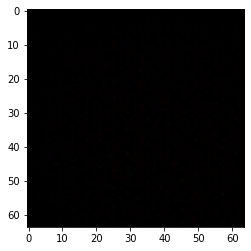

In [81]:
generator = generator_model()
noise = tf.random.normal([1, 100])
generated_image = generator(noise, training=False)
print(generated_image)
plt.imshow(generated_image[0, :, :, :])

# Discriminator

In [4]:
def discriminator_model():
    model = tf.keras.Sequential()
    
    model.add(layers.Conv2D(filters=64, kernel_size=(5,5), strides=(2,2), padding='same', input_shape=[64, 64, 3]))
    model.add(layers.BatchNormalization(epsilon = 1e-5))
    model.add(layers.LeakyReLU())

    model.add(layers.Conv2D(filters=128, kernel_size=(5,5), strides=(2,2), padding='same'))
    model.add(layers.BatchNormalization(epsilon = 1e-5))
    model.add(layers.LeakyReLU())
    
    model.add(layers.Conv2D(filters=256, kernel_size=(5,5), strides=(2,2), padding='same'))
    model.add(layers.BatchNormalization(epsilon = 1e-5))
    model.add(layers.LeakyReLU())
    
    model.add(layers.Conv2D(filters=512, kernel_size=(5,5), strides=(1,1), padding='same'))
    model.add(layers.BatchNormalization(epsilon = 1e-5))
    model.add(layers.LeakyReLU())
    
    model.add(layers.Conv2D(filters=1024, kernel_size=(5,5), strides=(2,2), padding='same'))
    model.add(layers.BatchNormalization(epsilon = 1e-5))
    model.add(layers.LeakyReLU())
    
    model.add(layers.Flatten())
    model.add(layers.Dense(1, activation='relu'))
    
    return model